In [ ]:
import numpy as np
import torch
import torchvision
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
! pip install git+https://github.com/davidbau/baukit
! pip install torchinfo
! unzip -q flat_spectrograms.zip

  Cloning https://github.com/davidbau/baukit to /tmp/pip-req-build-y6p6hi4l
  Running command git clone --filter=blob:none --quiet https://github.com/davidbau/baukit /tmp/pip-req-build-y6p6hi4l
  Resolved https://github.com/davidbau/baukit to commit 9d51abd51ebf29769aecc38c4cbef459b731a36e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
replace flat_spectrograms/Background/Cross_A_01_050520_212731_30056_2470.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
from baukit import show
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_path = "flat_spectrograms" # "data/spectrograms/train"
# test_path = "mnist_4440/test"
train_set = ImageFolder(train_path)
print("Number of images in the training set =", len(train_set))

FileNotFoundError: Found no valid file for the classes .ipynb_checkpoints. Supported extensions are: .jpg, .jpeg, .png, .ppm, .bmp, .pgm, .tif, .tiff, .webp

In [ ]:
idx = 4440
item = train_set[idx]
print(f"{idx}th item is a pair", item)

img, label = train_set[idx]
show(img)
print(f"{label=} ({train_set.classes[label]})")

4440th item is a pair (tensor([[[0.0667, 0.1373, 0.1137,  ..., 0.0667, 0.0667, 0.0706],
         [0.0706, 0.1176, 0.1137,  ..., 0.0667, 0.0627, 0.0667],
         [0.0863, 0.0941, 0.1059,  ..., 0.0667, 0.0588, 0.0667],
         ...,
         [0.0745, 0.0745, 0.0667,  ..., 0.0627, 0.0745, 0.0510],
         [0.0588, 0.0627, 0.0667,  ..., 0.0667, 0.0745, 0.0588],
         [0.0431, 0.0510, 0.0667,  ..., 0.0667, 0.0784, 0.0667]],

        [[0.0667, 0.1373, 0.1137,  ..., 0.0667, 0.0667, 0.0706],
         [0.0706, 0.1176, 0.1137,  ..., 0.0667, 0.0627, 0.0667],
         [0.0863, 0.0941, 0.1059,  ..., 0.0667, 0.0588, 0.0667],
         ...,
         [0.0745, 0.0745, 0.0667,  ..., 0.0627, 0.0745, 0.0510],
         [0.0588, 0.0627, 0.0667,  ..., 0.0667, 0.0745, 0.0588],
         [0.0431, 0.0510, 0.0667,  ..., 0.0667, 0.0784, 0.0667]],

        [[0.0667, 0.1373, 0.1137,  ..., 0.0667, 0.0667, 0.0706],
         [0.0706, 0.1176, 0.1137,  ..., 0.0667, 0.0627, 0.0667],
         [0.0863, 0.0941, 0.1059,  

label=0 (Background)


In [ ]:
from torchvision import transforms
img_size = 256
train_set = torchvision.datasets.ImageFolder(train_path, transform=transforms.Compose([ToTensor(), transforms.Resize((img_size, img_size))]))

In [ ]:
img, label = train_set[1189]

# now the image is a tensor
# img.resize((3, 256, 256))
# img#.shape
# torchvision.transforms.Resize((256, 256))(img)

In [ ]:
train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size=128,
    shuffle=True,
    # num_workers=16,
    pin_memory=True,
)

In [ ]:
images, labels = next(train_loader.__iter__())
print(f"{images.shape=}, {labels.shape=}")

images.shape=torch.Size([128, 3, 256, 256]), labels.shape=torch.Size([128])


In [ ]:
# ## Some helper functions to view network parameters
from torchinfo import summary

def view_network_shapes(model, input_shape):
    print(summary(model, input_size=input_shape))

def view_network_parameters(model):
    # Visualise the number of parameters
    tensor_list = list(model.state_dict().items())
    total_parameters = 0
    print("Model Summary\n")
    for layer_tensor_name, tensor in tensor_list:
        total_parameters += int(torch.numel(tensor))
        print("{}: {} elements".format(layer_tensor_name, torch.numel(tensor)))
    print(f"\nTotal Trainable Parameters: {total_parameters}!")

In [ ]:
from torch import nn

def cnn_classifier():
    torch.manual_seed(4440)  # for reproducibility
    ##########################################################################
    # **Exercise 4.2.2.1**
    # TODO: Make a CNN classifier for the task wrapped in an nn.Sequential module.
    # You can vary your architecture choices (# layers, # convs, activation functions, regularization, etc.)
    # However, your parameter size should not be more than 0.5 MB. Use the `view_network_shapes` function to get the `Params size`
    model = nn.Sequential(
        nn.Conv2d(3, 3, kernel_size=3, padding=3, stride=2),
        nn.Dropout(p=0.1),
        nn.ReLU(),
        nn.BatchNorm2d(3),
        nn.Conv2d(3, 4, kernel_size=3, padding=2, stride=2),
        nn.Dropout(p=0.1),
        nn.ReLU(),
        nn.BatchNorm2d(4),
        nn.Conv2d(4, 6, kernel_size=2, padding=0, stride=2),
        nn.Dropout(p=0.1),
        nn.ReLU(),
        nn.BatchNorm2d(6),
        nn.Conv2d(6, 8, kernel_size=2, padding=0, stride=2),
        nn.Dropout(p=0.1),
        nn.ReLU(),
        nn.BatchNorm2d(8),
        nn.Conv2d(8, 10, kernel_size=2, padding=0, stride=2),
        nn.Dropout(p=0.1),
        nn.ReLU(),
        nn.BatchNorm2d(10),
        nn.Flatten(),
        nn.Linear(640, 24),
        nn.ReLU(),
        nn.Linear(24,6),
        nn.Softmax()
        # nn.Conv2d(3,8,kernel_size=4, padding=3, stride=2),
        # nn.Dropout(p=0.2),
        # nn.ReLU(),
        # nn.BatchNorm2d(8),
        # nn.Conv2d(8, 12, kernel_size=4, padding=1, stride=2),
        # nn.Dropout(p=0.2),
        # nn.ReLU(),
        # nn.BatchNorm2d(12),
        # nn.Conv2d(12, 16, kernel_size=3, padding=0),
        # nn.Dropout(p=0.2),
        # nn.ReLU(),
        # nn.BatchNorm2d(16),
        # nn.Flatten(),
        # nn.Linear(576, 64),
        # nn.ReLU(),
        # nn.Linear(64,10),
        # nn.Softmax()
    )
    ##########################################################################
    return model


model = cnn_classifier().to(device)
view_network_shapes(model, img[None].shape)

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [1, 6]                    --
├─Conv2d: 1-1                            [1, 3, 130, 130]          84
├─Dropout: 1-2                           [1, 3, 130, 130]          --
├─ReLU: 1-3                              [1, 3, 130, 130]          --
├─BatchNorm2d: 1-4                       [1, 3, 130, 130]          6
├─Conv2d: 1-5                            [1, 4, 66, 66]            112
├─Dropout: 1-6                           [1, 4, 66, 66]            --
├─ReLU: 1-7                              [1, 4, 66, 66]            --
├─BatchNorm2d: 1-8                       [1, 4, 66, 66]            8
├─Conv2d: 1-9                            [1, 6, 33, 33]            102
├─Dropout: 1-10                          [1, 6, 33, 33]            --
├─ReLU: 1-11                             [1, 6, 33, 33]            --
├─BatchNorm2d: 1-12                      [1, 6, 33, 33]            12
├─Conv2d: 1-13 

In [ ]:
# training the model
def train_model(model, train_loader, loss_fn, optimizer):
    model.train()
    # Initiate a loss monitor
    train_loss = []
    correct_predictions = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        # predict the class
        predicted = model(images)
        loss = loss_fn(predicted, labels)
        correct_predictions += (predicted.argmax(dim=1) == labels).sum().item()

        # Backward pass (back propagation)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss.append(loss.item())

    return np.mean(train_loss), correct_predictions / len(train_loader.dataset)


# evaluating the model
@torch.inference_mode()  # understand what torch.inference_mode() or torch.no_grad() does
def evaluate_model(model, val_loader, loss_fn, return_confusion_matrix=False):
    model.eval()
    # Initiate a loss monitor
    val_loss = []
    correct_predictions = 0

    if return_confusion_matrix:
        confusion_matrix = torch.zeros(
            len(val_loader.dataset.classes), len(val_loader.dataset.classes)
        )

    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)
        # predict the class
        predicted = model(images)
        loss = loss_fn(predicted, labels)
        correct_predictions += (predicted.argmax(dim=1) == labels).sum().item()

        if return_confusion_matrix:
            for t, p in zip(labels.view(-1), predicted.argmax(dim=1).view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

        val_loss.append(loss.item())

    val_loss = np.mean(val_loss)
    val_acc = correct_predictions / len(val_loader.dataset)

    if return_confusion_matrix:
        return val_loss, val_acc, confusion_matrix
    else:
        return val_loss, val_acc

100%|██████████| 230/230 [01:39<00:00,  2.32it/s]


Text(0.5, 1.0, 'Distribution of Classes in Training Set')

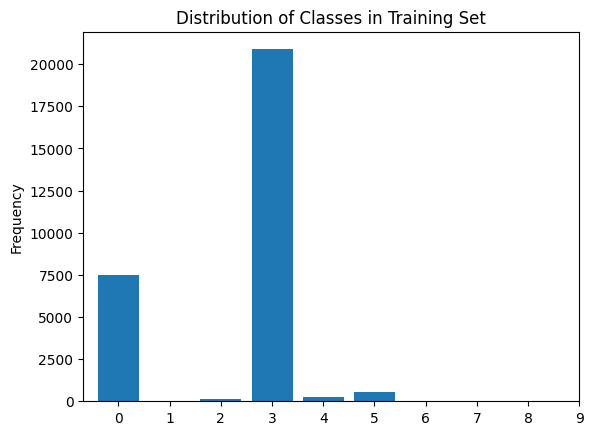

In [ ]:
# plot the data distribution in the training set

from tqdm import tqdm
from matplotlib import pyplot as plt

counter = torch.zeros(len(train_set.classes))
for images, labels in tqdm(train_loader):
    for label in labels:
        counter[label] += 1

##########################################################
# **Exercise 4.2.1.2**
# TODO: Plot the distribution of classes in the training set as a bar plot
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
plt.bar(list(range(len(counter))), counter)
plt.xticks(range(10))
plt.ylabel("Frequency")
plt.title("Distribution of Classes in Training Set")

# raise NotImplementedError

##########################################################

In [ ]:
weight = max(counter) / counter
weight
# weight + torch.ones(weight.shape)
2.7960e+00, 2.0886e+03, 1.4919e+02, 1.0000e+00, 7.7643e+01, 3.8678e+01

(2.796, 2088.6, 149.19, 1.0, 77.643, 38.678)

In [ ]:
w2 = weight + torch.ones(weight.shape)# * sum(weight)
w2 / sum(w2)
# 3.7960e+00, 2.0896e+03, 1.5019e+02, 2.0000e+00, 7.8643e+01, 3.9678e+01
# [1.6058e-03, 8.8396e-01, 6.3533e-02, 8.4606e-04, 3.3268e-02, 1.6785e-02]

tensor([1.6058e-03, 8.8396e-01, 6.3533e-02, 8.4606e-04, 3.3268e-02, 1.6785e-02])

In [ ]:
torch.manual_seed(4440)

model = cnn_classifier().to(device)
epochs = 4 #10  # your model should be able to get > 98% validation accuracy on the first 10 epochs
####################################################################
# **Exercise 4.2.2.2**
# TODO: choose values for your hyperparameters
learning_rate = 0.01 #0.005 # None
weight_decay = 0.001 # None
# TODO: choose a loss function and optimizer
loss_fn = torch.nn.CrossEntropyLoss(weight = w2 / sum(w2)) #None
loss_fn = torch.nn.CrossEntropyLoss() #None
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay) # None
####################################################################

training_losses = []
validation_losses = []

for epoch in range(epochs):
    train_loss, train_acc = train_model(model, train_loader, loss_fn, optimizer)
    training_losses.append(train_loss)
    # val_loss, val_acc = evaluate_model(model, val_loader, loss_fn)
    # validation_losses.append(val_loss)
    print(
        f"epoch: {epoch+1}/{epochs} | train loss={np.mean(train_loss):.4f}, {train_acc=:.4f}"# | val loss: {np.mean(val_loss):.4f}, {val_acc=:.4f}"
    )

epoch: 1/4 | train loss=1.2685, train_acc=0.7787
epoch: 2/4 | train loss=1.2311, train_acc=0.8127
epoch: 3/4 | train loss=1.1979, train_acc=0.8444
epoch: 4/4 | train loss=1.1823, train_acc=0.8621


In [ ]:
# for name, param in model.named_parameters():
#     print(name, param.shape, param)

In [ ]:
def draw_confusion_matrix(confusion_matrix, labels, cmap="Blues"):
    confusion_matrix = np.array(confusion_matrix)
    assert confusion_matrix.shape[0] == confusion_matrix.shape[1]
    assert confusion_matrix.shape[0] == len(labels)

    fig, ax = plt.subplots(figsize=(7, 7))
    plt.imshow(confusion_matrix, cmap=cmap)

    ax.set_xticks(np.arange(len(train_set.classes)), labels)
    ax.set_yticks(np.arange(len(train_set.classes)), labels)
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right")

    for true_label in range(len(train_set.classes)):
        for pred_label in range(len(train_set.classes)):
            ax.text(
                pred_label,
                true_label,
                int(confusion_matrix[true_label, pred_label]),
                ha="center",
                va="center",
                color="black",
            )

    fig.tight_layout()
    plt.show()

train_loss=1.1620352491088535, train_acc=0.8832679515606345


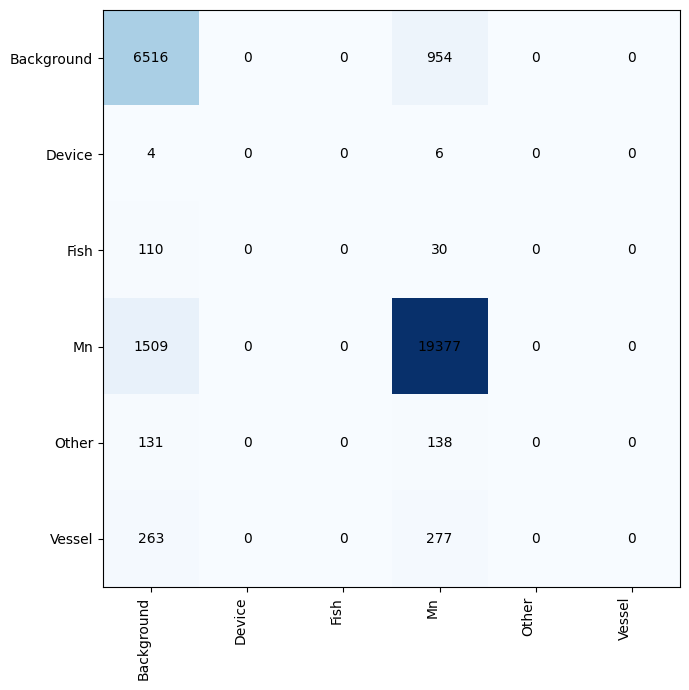

In [ ]:
train_loss, train_acc, confusion_matrix = evaluate_model(
    model, train_loader, loss_fn, return_confusion_matrix=True
)
print(f"{train_loss=}, {train_acc=}")
draw_confusion_matrix(confusion_matrix, train_set.classes)

train_loss=1.6932462780371955, train_acc=0.7699130138154529


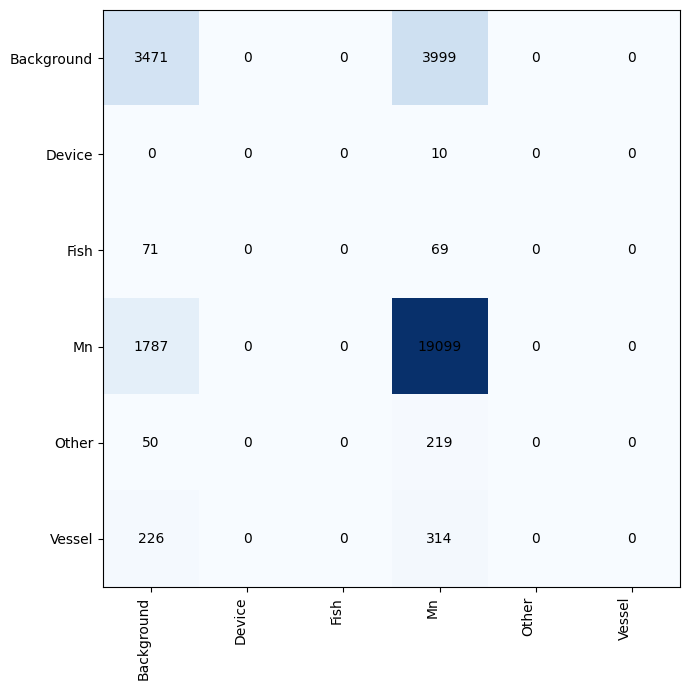

In [ ]:
# train_loss, train_acc, confusion_matrix = evaluate_model(
#     model, train_loader, loss_fn, return_confusion_matrix=True
# )
print(f"{train_loss=}, {train_acc=}")
draw_confusion_matrix(confusion_matrix, train_set.classes)

In [ ]:
import matplotlib.pyplot as plt